<a href="https://colab.research.google.com/github/PrachiJadhav12/Product-Classification/blob/main/Product_Classification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the necessary libraries and modules 
import pandas as pd
import re 
import nltk 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, naive_bayes, svm

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline


In [ ]:
#Reading the csv file using pandas read_csv
df = pd.read_csv("/content/drive/MyDrive/Data Set/flipkart_com-ecommerce_sample.csv")

In [ ]:
#To view the first five rows of the dataframe
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
#Outputs the number of rows and columns in the dataframe
df.shape

(20002, 15)

In [ ]:
#Name of all the columns in our dataframe
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
#Outputs the statistical features of only numerical columns
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [ ]:
#Used to ouput total number of non-null values in each row, data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In this task we will take the **"description"** column as our main feature.
We can see that we have two null values in description column, in the code cell below we are trying to get the index of these instances.

In [ ]:
df[df['description'].isnull()].index

Int64Index([553, 17299, 20000, 20001], dtype='int64')

In [ ]:
#Printing out the description of the index 553,17299, 20000 and 20001
print(df['description'][553])
print(df['description'][17299])
print(df['description'][20000])
print(df['description'][20001])

nan
nan
nan
nan


If we have decided to take description column as the main feature, we can drop the above mentioned instances from our data frame as it doesn't have any description and thus it can't be used for either training or testing our model.

In [ ]:
df.drop([553, 17299,20000,20001] , inplace = True)

In [ ]:
# We have dropped two rows
df.shape

(19998, 15)

In [ ]:
#Let's print out one random description to see what does our features look like 
print(df['description'][42])

Himmlisch ST381 Magnetic Sun Shade For Maruti Alto (Side Window) Price: Rs. 1,899 Beat the heat this summer and feel like a VIP with Himmlisch Car Window Magnetic Sunshades. These magnetic sunshades create a mesh layer to stops the heat. Magnet border gets easily stick to your car window door edges (No need of Suction cups) Features: Block UV Rays Keeps Car Cool Easy to install and remove Durable and Exact Fit Provides Complete privacy Resists Heat Mesh Type Sunshade Package Contents: 1 x Set Of 4 Magnetic Sunshades,Specifications of Himmlisch ST381 Magnetic Sun Shade For Maruti Alto (Side Window) General Brand Himmlisch Model Number ST381 Magnetic Placement Position Side Window Color Black Dimensions Weight 4000 g Depth 1.1 cm In the Box Sales Package 4 Sun Shade Pack of 4


We see that there are many characters in the description which are not useful for us. Thus the next step that we adopt is of cleaning the strings of the desription column. We can clean these strings with the help of regex library.

In [ ]:
def preprocessing_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

In [ ]:
'''
    Lets see how our string look after we appply the "preprocessing_string" function on it.
'''
print(df["description"][10])
print('\n')
print(preprocessing_string(df["description"][10]))

Key Features of Ladela Bellies Brand: LADELA Color : Black,Ladela Bellies Price: Rs. 950 Experience the best bellies from the house of Ladela. Providing the best material to keep your feet cozy and active for the whole day.,Specifications of Ladela Bellies General Occasion Casual Ideal For Women Shoe Details Heel Height 0 inch Outer Material PU Color Black


key features of ladela bellies brand ladela color black ladela bellies price rs experience the best bellies from the house of ladela providing the best material to keep your feet cozy and active for the whole day specifications of ladela bellies general occasion casual ideal for women shoe details heel height inch outer material pu color black


As mentioned in the task, the main goal is to find the category of product. The **"product_category_tree"** column in dataframe is our target.

In [ ]:
#lets look at the product_category_tree column
df['product_category_tree']

0            Clothing
1           Furniture
2            Footwear
3            Clothing
4        Pet Supplies
             ...     
19995       Baby Care
19996       Baby Care
19997       Baby Care
19998       Baby Care
19999       Baby Care
Name: product_category_tree, Length: 19998, dtype: object

We can see that there are numerous categories in the dataframe, also we can notice that in each category there are some sub categories, as per the task requirement we only need focus on the "main" or so called **"parent"** categories.

For this purpose we need to process these categories in order to extract the "main" category of the product.

In [ ]:
# Category processing
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [ ]:
#lets look at some of the main categories extracted by the help of the lambda, split and strip.
print(df['product_category_tree'][78])
print(df["product_category_tree"][0])

Mobiles & Accessories
Clothing


In [ ]:
#Total number of uniques "parent"
df['product_category_tree'].nunique()

266

In [ ]:
#Printing out all the unique categories
df['product_category_tree'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies',
       'Eternal Gandhi Super Series Crystal Paper Weight..."]',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care',
       'Bengal Blooms Rose Artificial Plant  with Pot (3..."]',
       'Bags, Wallets & Belts', 'Home Decor & Festive Needs',
       'Automotive', 'Tools & Hardware',
       'Vishudh Printed Women\'s Straight Kurta"]',
       'Vishudh Printed Women\'s Anarkali Kurta"]',
       'BuildTrack PIR Wireless Motion Sensor - One Swit..."]',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER..."]',
       'MASARA Solid Women\'s Straight Kurta"]',
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER..."]',
       'Behringer Xenyx 502 Analog Sound Mixer"]',
       'Noor Embroidered Women\'s Straight Kurta"]',
       'Libas Printed Women\'s A-line Kurta"]',
       'Libas Printed Women\'s Anarkali Kurta"]', 'Home Furnishing',
       'Baby Care', 'Mobiles & Accessories', 'Food & Nutriti

As we can notice there are many examples where the product doesn't have a definite category.

For example instead of categorising the product under clothing, it's rather filled the product detail as the category.
See the code cell below, which shows a example of indefinite category.

In [ ]:
# Taking only top categories
top_cat = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [ ]:
print(df['product_category_tree'][50])

Vishudh Printed Women's Straight Kurta"]


In order to prevent such instances where the product category is not definite we will chose only those categories which have a definite property such as clothing, footwear, camera and acessories etc.

We have chosen the first 28 categories. We can run the following code to determine the index until which we have a definite product category
We can run the following python code to get a list all the definite categories in descending order by "uniq_id", then understand why we chose first 28 categories, 

list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(30).index)

In [ ]:
# Taking only top categories
top_cat = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [ ]:
print(top_cat)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


In [ ]:
# Selecting only relevant columns
processed_df = df[df['product_category_tree'].isin(top_cat)][['product_category_tree','description']]

In [ ]:
processed_df

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...
...,...,...
19995,Baby Care,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996,Baby Care,Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...
19998,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...


In the code cell below we are plotting a bar plot to show which category has maximum number of product.

We should notice that the total no. of products will not be equal to 20,000 as we have removed some rows from our original dataset as mentioned in the above cells

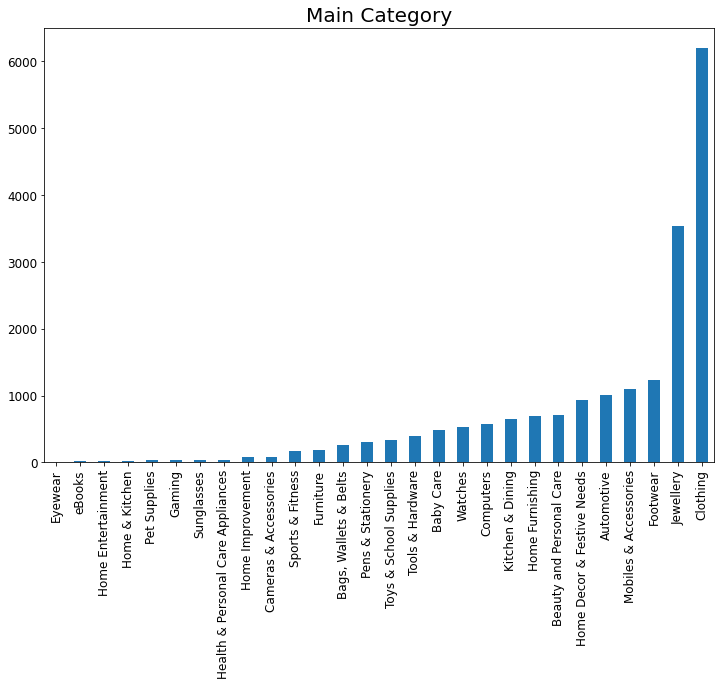

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             35
Gaming                                 35
Pet

In [ ]:
plt.figure(figsize=(12,8))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=True).plot(kind='bar')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

In [ ]:
# Cleaning strings
processed_df['description'] = processed_df['description'].astype('str').apply(preprocessing_string)

In [ ]:
processed_df

,product_category_tree,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish col...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...
...,...,...
19995,Baby Care,buy walldesign small vinyl sticker for rs onli...
19996,Baby Care,buy wallmantra large vinyl stickers sticker fo...
19997,Baby Care,buy elite collection medium acrylic sticker fo...
19998,Baby Care,buy elite collection medium acrylic sticker fo...


In [ ]:
# Creating a list of categories for later use
cat_list = list(processed_df['product_category_tree'].unique())

In [ ]:
# Printing the list of top categories
print(cat_list)

['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Pens & Stationery', 'Sports & Fitness', 'Beauty and Personal Care', 'Bags, Wallets & Belts', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers', 'Cameras & Accessories', 'Health & Personal Care Appliances', 'Gaming', 'Home Improvement', 'Sunglasses', 'Home Entertainment', 'Eyewear', 'eBooks']


In [ ]:
# Encoding the product category
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded

In [ ]:
#Printing the encoded value and their corresponding values
for i in range(28):
    print(str(i) + "-" + le.inverse_transform([i]))

['0-Automotive']
['1-Baby Care']
['2-Bags, Wallets & Belts']
['3-Beauty and Personal Care']
['4-Cameras & Accessories']
['5-Clothing']
['6-Computers']
['7-Eyewear']
['8-Footwear']
['9-Furniture']
['10-Gaming']
['11-Health & Personal Care Appliances']
['12-Home & Kitchen']
['13-Home Decor & Festive Needs']
['14-Home Entertainment']
['15-Home Furnishing']
['16-Home Improvement']
['17-Jewellery']
['18-Kitchen & Dining']
['19-Mobiles & Accessories']
['20-Pens & Stationery']
['21-Pet Supplies']
['22-Sports & Fitness']
['23-Sunglasses']
['24-Tools & Hardware']
['25-Toys & School Supplies']
['26-Watches']
['27-eBooks']


In [ ]:
processed_df.head()

,product_category_tree,description
0,5,key features of alisha solid women s cycling s...
1,9,fabhomedecor fabric double sofa bed finish col...
2,8,key features of aw bellies sandals wedges heel...
3,5,key features of alisha solid women s cycling s...
4,21,specifications of sicons all purpose arnica do...


We have taken only those products which have a definite categories.

In the code cell below we can notice the change in the shape of our dataframe.

In [ ]:
#Shape of processed_df
processed_df.shape

(19661, 2)

The following code cell is for spliting our data into traing and testing data

We are splitting our dataset as follows:
Training Data - 80%
Testing Data - 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15728,)
(15728,)
(3933,)
(3933,)


Let's look at our training features:

In [ ]:
print(X_train.head())

1272     specifications of speedwav sun shade for tata ...
1418     key features of finger s printed men s track p...
11017    speedwav single pipe car air pressure nissan m...
13234    dailyobjects back cover for apple ipad white p...
17242    buy amber cotton hand towel at rs at flipkart ...
Name: description, dtype: object


Let's look at our training labels:

In [ ]:
print(y_train.head())

1272      0
1418      5
11017     0
13234    19
17242    15
Name: product_category_tree, dtype: int64


Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [ ]:
'''
This code block is for converting the training data to vectorized form

'''
# Instantiating the vectorizer and removing stop words
vect = CountVectorizer(analyzer='word', stop_words = 'english')
# Converting the train data
X_train_matrix = vect.fit_transform(X_train) 

In [ ]:
# vect.get_feature_names()
X_train_matrix.shape

(15728, 17599)

rows x columns

document = rows

term = columns

In [ ]:
vect.vocabulary_

{'specifications': 14547,
 'speedwav': 14562,
 'sun': 15118,
 'shade': 13764,
 'tata': 15473,
 'grand': 6644,
 'dicor': 4213,
 'dashboard': 3849,
 'general': 6360,
 'brand': 1920,
 'model': 9945,
 'number': 10612,
 'placement': 11588,
 'position': 11830,
 'color': 3040,
 'silver': 14076,
 'dimensions': 4261,
 'weight': 17044,
 'height': 7023,
 'cm': 2947,
 'width': 17132,
 'depth': 4056,
 'box': 1874,
 'pack': 11026,
 'key': 8355,
 'features': 5635,
 'finger': 5778,
 'printed': 12031,
 'men': 9668,
 'track': 15948,
 'pants': 11133,
 'mens': 9673,
 'fancy': 5532,
 'pant': 11128,
 'material': 9520,
 'cotton': 3440,
 'outseam': 10954,
 'length': 8838,
 'inch': 7551,
 'inseam': 7722,
 'kangaroo': 8261,
 'pocket': 11698,
 'backside': 1198,
 'details': 4114,
 'closure': 2919,
 'knot': 8488,
 'fabric': 5458,
 'pockets': 11701,
 'pattern': 11231,
 'ideal': 7413,
 'trackpant': 15952,
 'additional': 224,
 'style': 15011,
 'code': 2993,
 'red': 12623,
 'dollar': 4458,
 'print': 12030,
 'single': 

In [ ]:
'''
This code block is for training vectorized data

'''
# Instantiate a Multinomial Naive Bayes model
model=MultinomialNB()

# Train the model
model.fit(X_train_matrix, y_train)

# Scoring the trained model
print("Accuracy of model on training data:" , model.score(X_train_matrix, y_train))

Accuracy of model on training data: 0.9503433367243134


In [ ]:
'''
This code block is for predicting & scoring test data

'''

# Converting the test data
X_test_matrix = vect.transform(X_test) 

# Scoring for the test data
print ("Accuracy of model on testing data:", model.score(X_test_matrix, y_test))

Accuracy of model on testing data: 0.9374523264683448


In [ ]:
'''
Time taken by our model for traing 
'''
%time model.fit(X_train_matrix, y_train)

CPU times: user 23.6 ms, sys: 52 µs, total: 23.7 ms
Wall time: 24.4 ms


MultinomialNB()

In [ ]:
# Printing score 
predicted_result=model.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       212
           1       0.91      0.62      0.74       108
           2       0.79      0.62      0.70        50
           3       0.82      0.91      0.86       133
           4       1.00      0.12      0.22        16
           5       0.98      0.99      0.99      1210
           6       0.90      0.83      0.87       132
           7       1.00      1.00      1.00         2
           8       0.98      0.99      0.98       270
           9       1.00      0.98      0.99        43
          10       1.00      0.86      0.92         7
          11       1.00      0.71      0.83         7
          12       1.00      0.67      0.80         6
          13       0.91      1.00      0.95       177
          14       0.00      0.00      0.00         3
          15       0.92      1.00      0.96       138
          16       1.00      0.54      0.70        13
          17       0.90    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we will use TfidfVectorizer and compare the accuracy of models on the basis of method of vectorization.

We can clearly see that Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.

In [ ]:
'''
This code block is for converting the training data to Tf-Idf form

'''
# Removing stop words
vectorizer = TfidfVectorizer(analyzer = 'word' , stop_words = 'english')
# Converting the train data
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
'''
This code block is for training

'''
# Instantiate a Multinomial Naive Bayes model
model2=MultinomialNB()

# Fitting to multinomial NB model
model2.fit(X_train_tfidf, y_train)

# Scoring the trained model (Expected to be above 95 percent)
print("Accuracy of model on training data:" , model2.score(X_train_tfidf, y_train))

Accuracy of model on training data: 0.8827568667344863


In [ ]:
'''
This code block is for predicting & scoring test data

'''
# Converting the test data
X_test_tfidf = vectorizer.transform(X_test) 

# Printing score
print ("Accuracy of model on testing data:" , model2.score(X_test_tfidf, y_test))

Accuracy of model on testing data: 0.8619374523264683


We used two vectorizer here, CountVectorizer and TfidfVectorizer, and out of these two vectorizer we can observe that the CountVectorizer performed better than TfidfVectorizer.

In the following models we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.

##Using Logistic Regression

In [ ]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , logreg.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.958555809814391
Accuracy of model on training data: 0.9761571719226857
                                   precision    recall  f1-score   support

                         Clothing       0.97      0.99      0.98       212
                        Jewellery       0.97      0.68      0.80       108
                         Footwear       0.91      0.82      0.86        50
            Mobiles & Accessories       0.93      0.92      0.93       133
                       Automotive       1.00      0.81      0.90        16
       Home Decor & Festive Needs       0.96      1.00      0.98      1210
         Beauty and Personal Care       0.96      0.94      0.95       132
                  Home Furnishing       1.00      1.00      1.00         2
                 Kitchen & Dining       0.98      1.00      0.99       270
                        Computers       1.00      0.91      0.95        43
                          Watches       1.00      0.71      0.83         7
                 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Stochastic Gradient Descent (SGD)

In [ ]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , sgd.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9425375031782355
Accuracy of model on training data: 0.9601347914547305
                                   precision    recall  f1-score   support

                         Clothing       0.93      0.98      0.96       212
                        Jewellery       0.86      0.45      0.59       108
                         Footwear       0.83      0.80      0.82        50
            Mobiles & Accessories       0.92      0.89      0.91       133
                       Automotive       1.00      0.88      0.93        16
       Home Decor & Festive Needs       0.94      1.00      0.97      1210
         Beauty and Personal Care       0.92      0.92      0.92       132
                  Home Furnishing       1.00      1.00      1.00         2
                 Kitchen & Dining       0.96      1.00      0.98       270
                        Computers       0.95      0.95      0.95        43
                          Watches       1.00      0.86      0.92         7
                

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Support Vector Machines(SVM)

In [143]:
svmsvc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
               ])
svmsvc.fit(X_train, y_train)

y_pred = svmsvc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , svmsvc.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9753368929570303
Accuracy of model on training data: 0.991353001017294
                                   precision    recall  f1-score   support

                         Clothing       0.99      0.99      0.99       212
                        Jewellery       0.94      0.81      0.87       108
                         Footwear       0.94      0.96      0.95        50
            Mobiles & Accessories       0.96      0.95      0.96       133
                       Automotive       1.00      0.88      0.93        16
       Home Decor & Festive Needs       0.99      1.00      0.99      1210
         Beauty and Personal Care       0.98      0.95      0.97       132
                  Home Furnishing       1.00      1.00      1.00         2
                 Kitchen & Dining       1.00      1.00      1.00       270
                        Computers       1.00      0.95      0.98        43
                          Watches       0.86      0.86      0.86         7
                 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
#In this codeblock we are calculating the total no.of correct predictions made by our model using svm algorithm
nr_correct = (y_test == svmsvc.predict((X_test))).sum()
print(nr_correct)

3836


In [146]:
X_test

3184     specifications of lumber boy self design boy s...
4639     buy allure auto cm car mat volkswagen vento fo...
3143     specifications of lumber boy printed boy s hoo...
5562     indian fashion guru artificial jewellery ceram...
14037    orange plum printed men s round neck t shirt b...
                               ...                        
3795     buy allure auto cm car mat tata indigo marina ...
7911     specifications of cutecumber girl s high low d...
11174    buy durian tulsa leatherette seater sofa for r...
1360     specifications of frabjous sterling silver toe...
19281    key features of wishkey wishkey combat gun wit...
Name: description, Length: 3933, dtype: object

In [156]:
test_desc = X_test[2333]
test_desc

'ploomz fashion women s push up bra buy pink ploomz fashion women s push up bra for only rs online in india shop online for apparels huge collection of branded clothes only at flipkart com'

Testing Blocks: Test your string

In [157]:
'''
Multinomial Naive Bayes
'''
le.inverse_transform(model.predict(vect.transform([test_desc])))

array(['Clothing'], dtype=object)

In [158]:
'''
Logistic Regression
'''
le.inverse_transform(logreg.predict([test_desc]))

array(['Clothing'], dtype=object)

In [159]:
'''
Support Vector Machines
'''
le.inverse_transform(svmsvc.predict([test_desc]))

array(['Clothing'], dtype=object)

We can input any description from the dataset and check how accurate our models are.


Out of all the algorithms we used we notice that the Support vector machine algorithm gives the highest accuracy.